# Enonce

Extrait de l’appel à projets :

Le jeu de données Open Food Facts est disponible sur le site officiel (ou disponible à ce lien en téléchargement). Les variables sont définies à cette adresse.

Les champs sont séparés en quatre sections :

Les informations générales sur la fiche du produit : nom, date de modification, etc.
Un ensemble de tags : catégorie du produit, localisation, origine, etc.
Les ingrédients composant les produits et leurs additifs éventuels.
Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données, en :

Réfléchissant à une idée d’application.
Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
Nettoyant les données en :
mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
Automatisant ces traitements pour éviter de répéter ces opérations

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.


# 1 Preleminary

EDA (exploratary data analisis)

Analyse de la forme :
- Identification de la target 
- Nombres de ligne et de colonnes
- Types de variables 
- Identification des variables manquantes (supprimer les cols plus de 70 % NAN)
- 

Analyse du fond :
- visualisation de l atarget 
- Compréhension des différentes variables
- Visualisation des relations features
- Identification des ouliers


## 1.1 Import


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data = pd.read_csv('Source/data_sante.csv',sep=';',encoding='ISO-8859-1')


C:\Users\Dragomir\AppData\Local\Temp\ipykernel_24568\1744328338.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48,95,116,117,119,121,122,123,124,125,126,127,128,129,130,131,132,133,136,137,138,140,141,142,143,144,145,146,147,148,149,157) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Source/data_sante.csv',sep=';',encoding='ISO-8859-1')


## 1.2 Graphics

In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(320791, 162)

In [5]:
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g       object
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [6]:
val_null = data.isna().sum()
val_null

code                           24
url                            36
creator                        15
created_t                       8
created_datetime               28
                            ...  
carbon-footprint_100g      320534
nutrition-score-fr_100g    105044
nutrition-score-uk_100g    105044
glycemic-index_100g        320791
water-hardness_100g        320791
Length: 162, dtype: int64

In [7]:
heatmap_cols = data.isna().mean(axis = 0)
heatmap_cols

code                       0.000075
url                        0.000112
creator                    0.000047
created_t                  0.000025
created_datetime           0.000087
                             ...   
carbon-footprint_100g      0.999199
nutrition-score-fr_100g    0.327453
nutrition-score-uk_100g    0.327453
glycemic-index_100g        1.000000
water-hardness_100g        1.000000
Length: 162, dtype: float64

In [8]:
heatmap_rows = data.isna().mean(axis=1)
heatmap_rows

0         0.895062
1         0.765432
2         0.753086
3         0.777778
4         0.833333
            ...   
320786    0.882716
320787    0.722222
320788    0.820988
320789    0.895062
320790    0.796296
Length: 320791, dtype: float64

<AxesSubplot:>

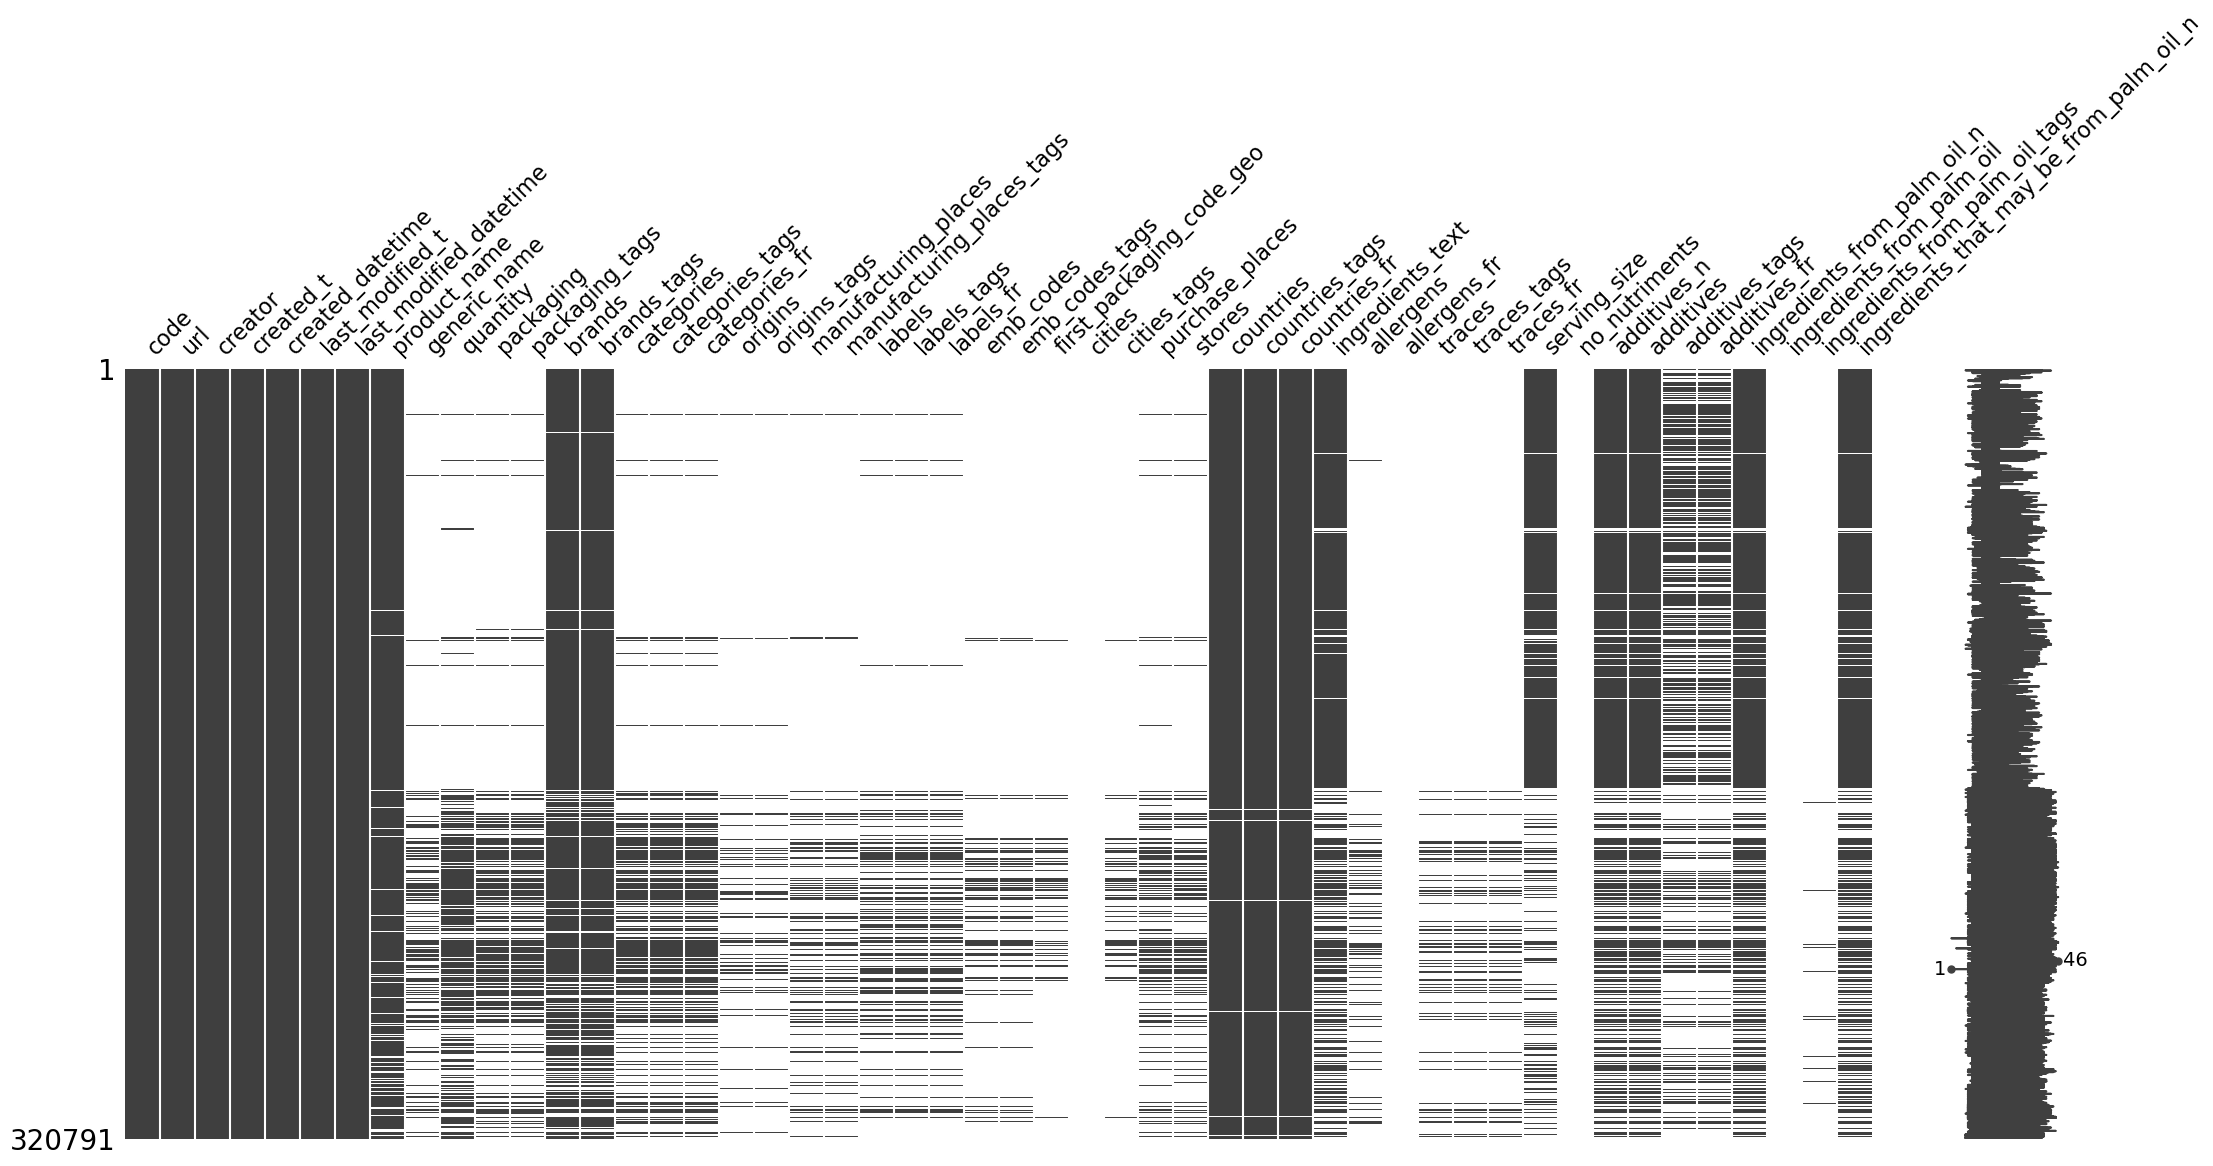

In [9]:
# Visualisation des valeurs manquantes

msno.matrix(data.iloc[:,0:50])

<AxesSubplot:>

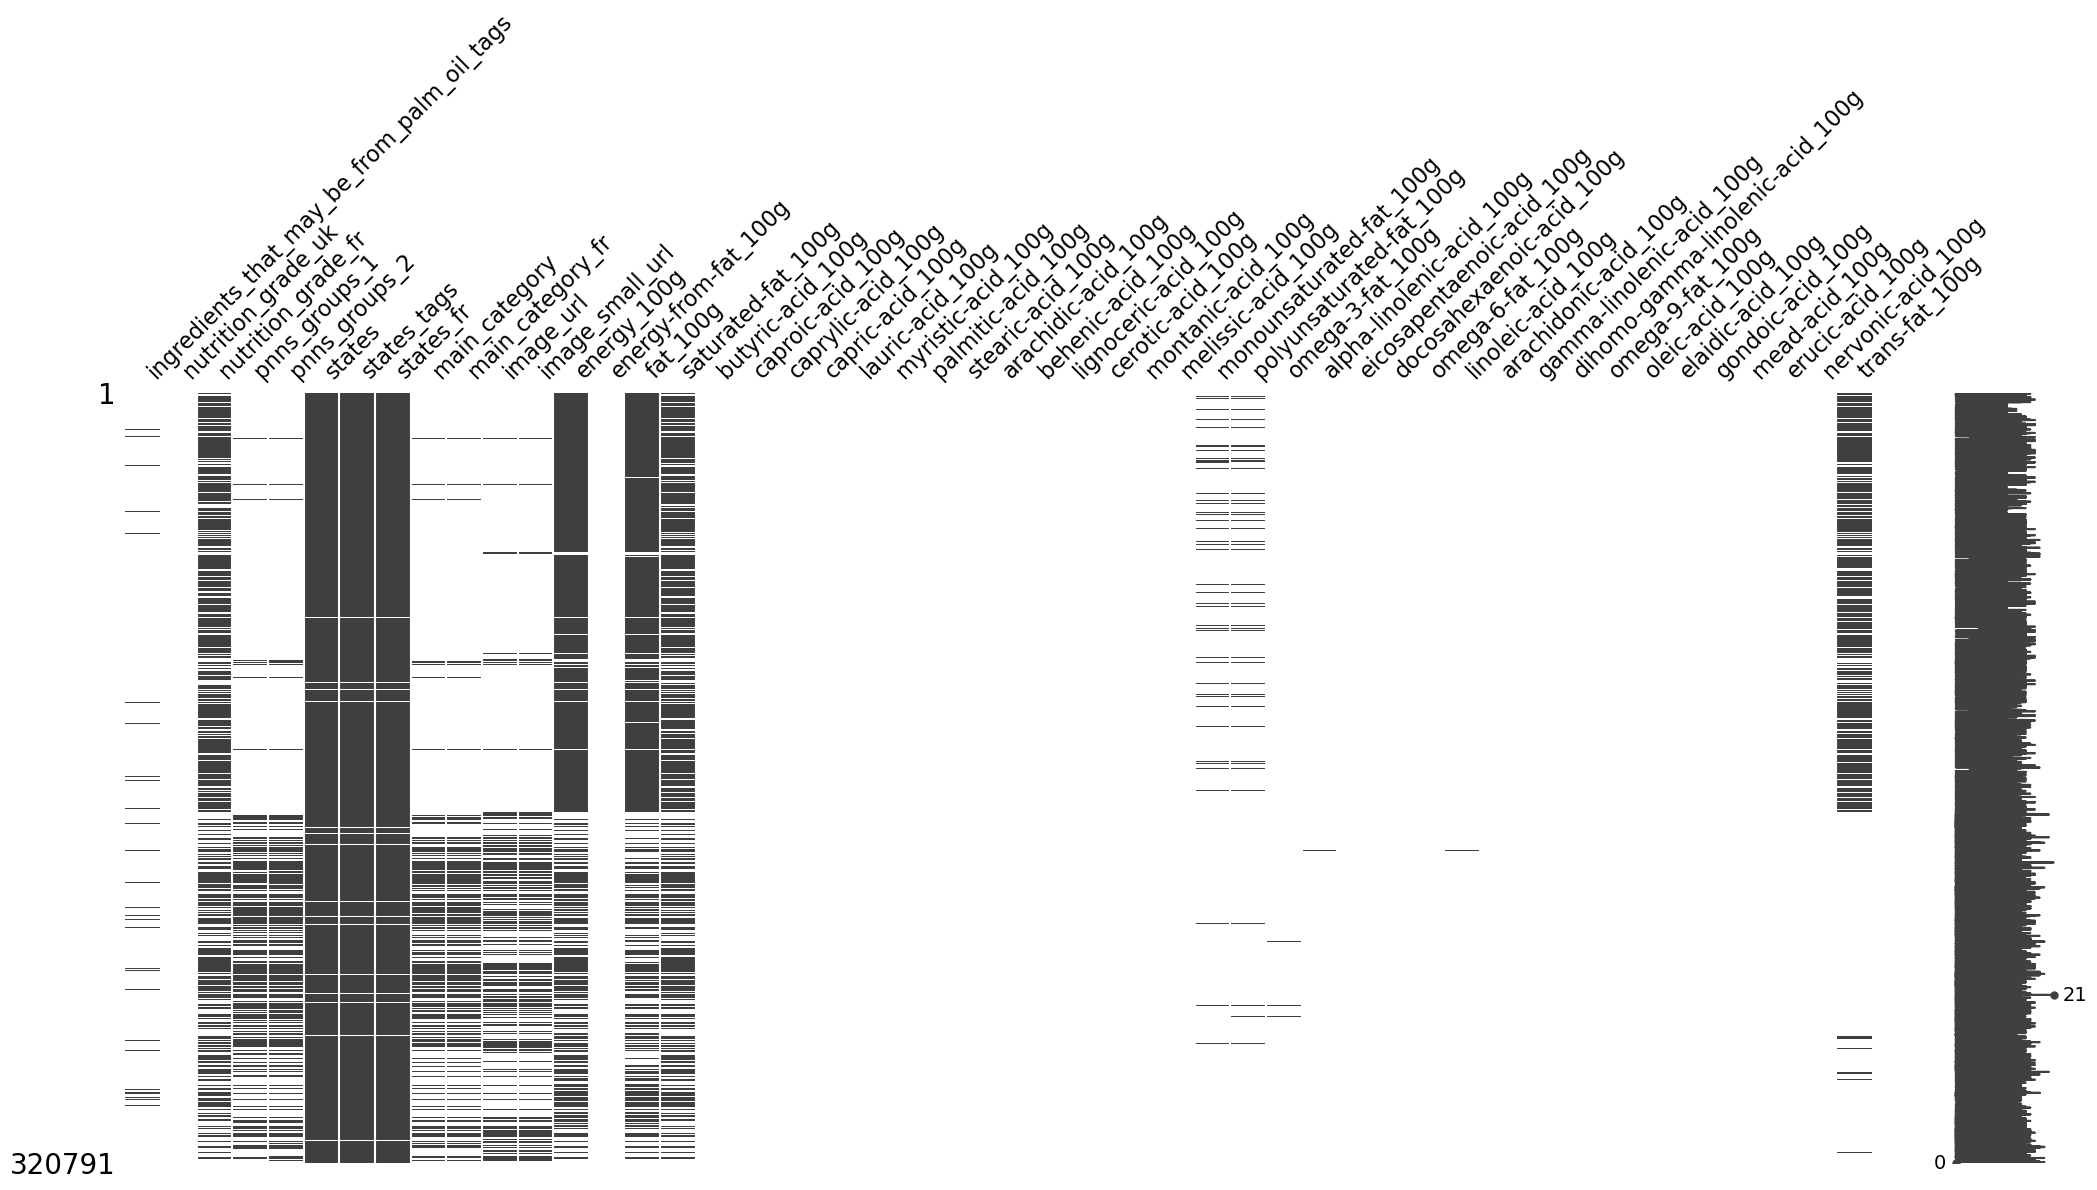

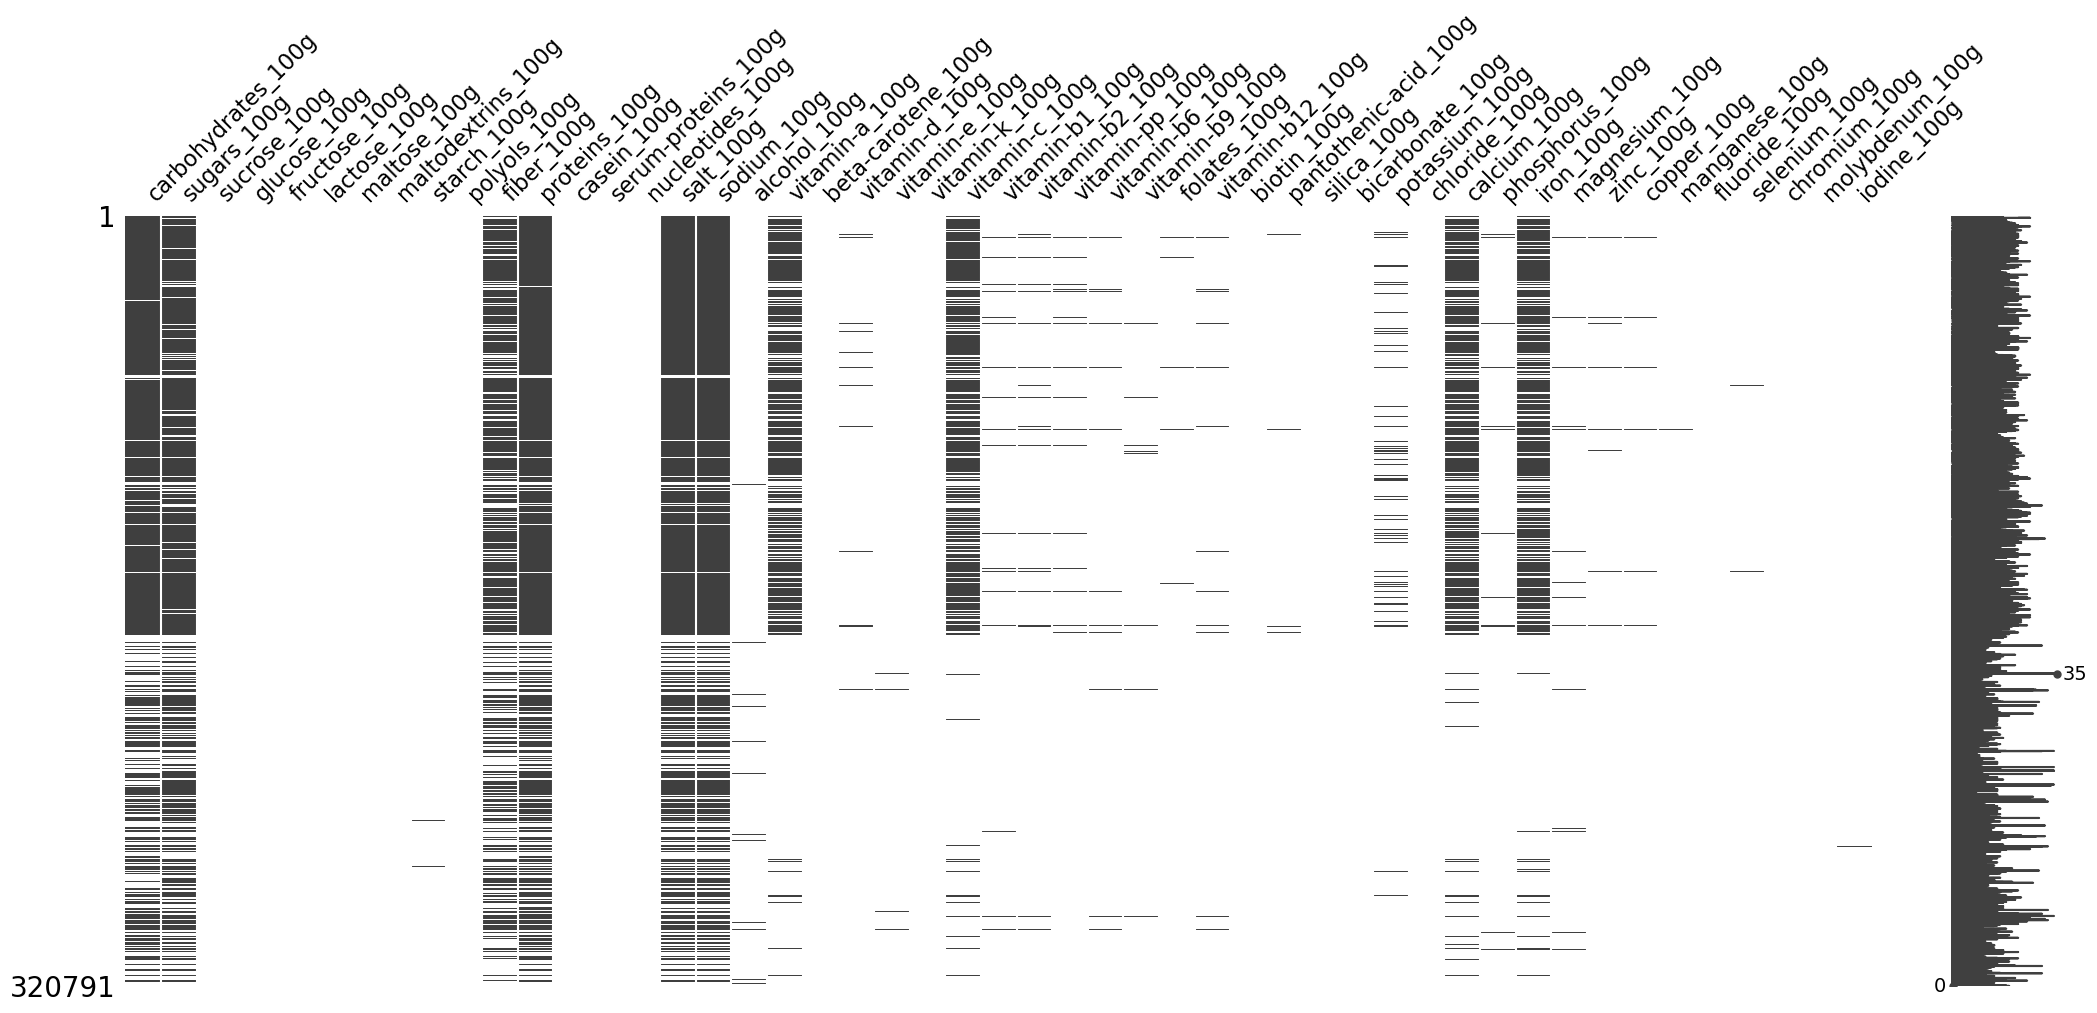

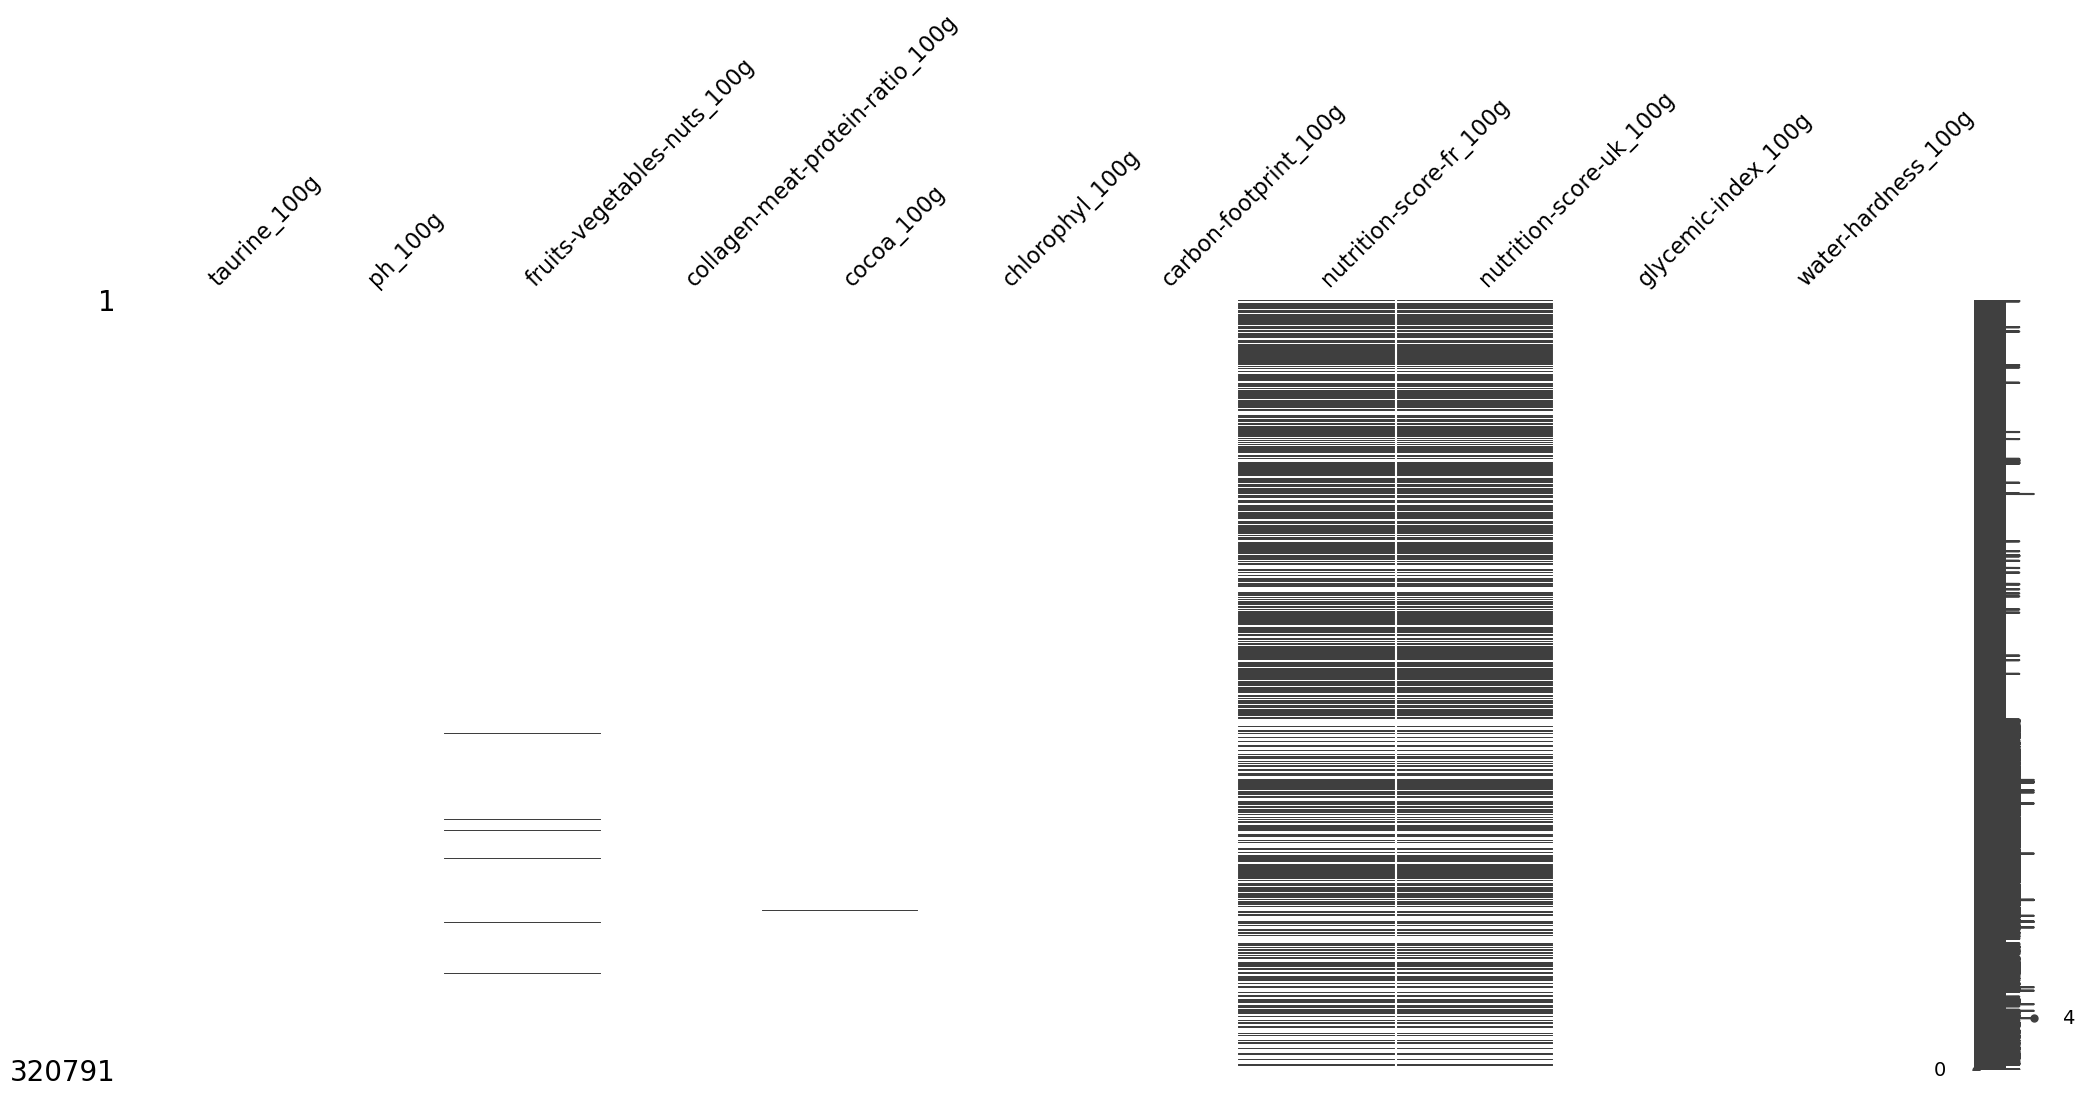

In [10]:
# Visualisation des valeurs manquantes

msno.matrix(data.iloc[:,51:100])
msno.matrix(data.iloc[:,101:150])
msno.matrix(data.iloc[:,151:162])

In [11]:
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g       object
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [15]:
data.columns[:49]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size',
       'no_nutriments', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags'],
      dtype='object')

In [18]:
data['ingredients_from_palm_oil_tags']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
320786    NaN
320787    NaN
320788    NaN
320789    NaN
320790    NaN
Name: ingredients_from_palm_oil_tags, Length: 320791, dtype: object

In [12]:
data.iloc[10000:10050,10:20]

,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places
10000,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN
10005,NaN,NaN,Thrifty Payless Inc.,thrifty-payless-inc,NaN,NaN,NaN,NaN,NaN,NaN
10006,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN
10007,NaN,NaN,Thrifty Payless Inc.,thrifty-payless-inc,NaN,NaN,NaN,NaN,NaN,NaN
10008,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN
10009,NaN,NaN,Rite Aid Corporation,rite-aid-corporation,NaN,NaN,NaN,NaN,NaN,NaN


## Recherche de variables pertinentes

Les critères à retenir :

- Nutriscore.

  (nutriment à limiter)
- les acides gras, le sucre, le sel.
    
   (nutriments et aliments à favoriser)
- fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive.
    
Colonnes retenus dans le fichier : 

- Origine du produit
- L'url
- nova_group
- countries_tags OK 
- origins 
- pnns_groups_1 OK
- ingredients_text NON
- additives_fr OK
- nutrition_grade_fr OK
- nutrition-score-fr_100g OK
- energy_100g OK
- fat_100g OK
- saturated-fat_100g OK
- carbohydrates_100g OK
- fiber_100g OK
- proteins_100g OK
- salt_100g OK
- sugars_100g OK
- pnns_groups_1
- pnns (a voir)
- nova group (à voir)
- Selectionner les produits français
- product_name OK
- retirer brands (marque)
- retirer (Origins, ingerdient_text)
- pre cleaning (prendre seulement les variables pertinentes) et supprimer les valeurs manquantes et selectionner les produit français.
- Est ce qu'on garde les produits qui n'ont pas de nutri-score (piste de reflexion)
- prendre les features numériques
- tail 10 des valeurs 
- top 10 des head() regarder les valeurs par catégories
- quel va être la variable qualitative qui nva influancer notre choix

In [13]:
data['countries_tags'].unique()

array(['en:france', 'en:united-states', 'en:united-kingdom',
       'en:france,en:united-states', 'en:canada', 'en:switzerland',
       'en:spain', 'en:germany', 'en:slovenia', 'en:italy', 'en:romania',
       'en:australia', 'en:portugal', 'en:france,en:united-kingdom',
       'en:belgium,en:france,en:netherlands,en:united-kingdom',
       'en:guadeloupe', nan, 'en:united-kingdom,en:united-states',
       'en:canada,en:united-states', 'en:netherlands',
       'en:australia,en:france',
       'en:canada,en:france,en:switzerland,en:united-states',
       'en:france,en:united-states,en:etats-unis', 'en:ireland',
       'en:france,en:reunion', 'en:taiwan', 'en:australia,en:switzerland',
       'en:france,en:germany', 'en:brazil', 'en:belgium,en:france',
       'en:dominican-republic', 'en:united-states,en:australie',
       'en:saudi-arabia', 'en:united-arab-emirates', 'en:iraq',
       'en:kuwait', 'en:moldova', 'en:belgium', 'en:new-caledonia',
       'en:singapore', 'en:finland', 'en:a

In [14]:
data['countries_tags'].fillna('nan',inplace=True)
data.loc[100:106,['code','url']].values

array([[35293,
        'http://world-fr.openfoodfacts.org/produit/0000000035293/organic-wheat-free-tamari-san-j'],
       [35323,
        'http://world-fr.openfoodfacts.org/produit/0000000035323/organic-grade-b-maple-syrup-coombs-family'],
       [35583,
        'http://world-fr.openfoodfacts.org/produit/0000000035583/curry-lentil-soup-mix-taste-adventure'],
       [35590,
        'http://world-fr.openfoodfacts.org/produit/0000000035590/split-pea-soup-mix-taste-adventure'],
       [35613,
        'http://world-fr.openfoodfacts.org/produit/0000000035613/whole-wheat-n-honey-fig-bars-marin'],
       [36153,
        'http://world-fr.openfoodfacts.org/produit/0000000036153/chocolate-nut-crunch-sunridge'],
       [36252,
        'http://world-fr.openfoodfacts.org/produit/0000000036252/lion-peanut-x2-sunridge']],
      dtype=object)

In [15]:
variables = ['url','pnns_groups_1','product_name','countries_tags','ingredients_text','additives_fr','nutrition_grade_fr','nutrition-score-fr_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','sugars_100g']

mask = []
for i in data['countries_tags'].unique():
    try :
        if 'fr' in i:
            mask.append(i)
            
    except:print(f"error : {i}")
mask

mask = data['countries_tags'].isin(mask)
mask
data2 = data.loc[mask]
data2

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blÃ© noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bÅuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320780,"9,90641E+12",http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320782,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,ThÃ© vert Earl grey,thÃ© bio Ã©quitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320783,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thÃ© vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320784,"9,93501E+12",http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data2['url'][0:5].values

array(['http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao',
       'http://world-fr.openfoodfacts.org/produit/0000000024600/filet-de-boeuf',
       'http://world-fr.openfoodfacts.org/produit/0000000027205',
       'http://world-fr.openfoodfacts.org/produit/0000000036252/lion-peanut-x2-sunridge',
       'http://world-fr.openfoodfacts.org/produit/0000000039259/twix-x2'],
      dtype=object)

In [17]:
#  filtre les country_tags en mettant le nom en miniscule

variables = ['url','pnns_groups_1','product_name','countries_tags','ingredients_text','additives_fr','nutrition_grade_fr','nutrition-score-fr_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','sugars_100g']
filt_data = data.copy()
country_tags = []
[country_tags.append(i.lower()) for i in filt_data['countries_tags']]

mask = []
for i in filt_data['countries_tags'].unique():
    try :
        if 'france' in i:
            mask.append(i)
            
    except:print(f"error : {i}")
mask

mask = filt_data['countries_tags'].isin(mask)
mask
data2 = filt_data.loc[mask,variables]
data2['countries_tags'].unique()

array(['en:france', 'en:france,en:united-states',
       'en:france,en:united-kingdom',
       'en:belgium,en:france,en:netherlands,en:united-kingdom',
       'en:australia,en:france',
       'en:canada,en:france,en:switzerland,en:united-states',
       'en:france,en:united-states,en:etats-unis', 'en:france,en:reunion',
       'en:france,en:germany', 'en:belgium,en:france',
       'en:france,en:switzerland',
       'en:france,en:switzerland,en:united-states', 'en:france,en:italy',
       'en:france,en:united-kingdom,en:united-states',
       'en:australia,en:france,en:united-kingdom', 'en:canada,en:france',
       'en:canada,en:france,en:switzerland',
       'en:belgium,en:canada,en:france,en:switzerland',
       'en:france,en:saint-pierre-and-miquelon',
       'en:france,en:russia,en:spain,en:united-kingdom',
       'en:france,en:switzerland,en:united-kingdom',
       'en:france,en:new-zealand',
       'en:belgium,en:france,en:united-kingdom',
       'en:canada,en:france,en:united-sta

In [18]:
data2

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,NaN,Farine de blÃ© noir,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Filet de bÅuf,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Lion Peanut x2,"en:france,en:united-states","Milk chocolate coating (evaporated cane juice,...",E322 - LÃ©cithines,e,22.0,1883.0,20.0,12.5,70.0,2.5,2.5,0.09652,57.5
136,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Twix x2,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320780,http://world-fr.openfoodfacts.org/produit/9906...,NaN,Roussette du Bugey (2011),en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320782,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,c,2.0,21.0,0.2,0.2,0.5,0.2,0.5,0.0254,0.5
320783,http://world-fr.openfoodfacts.org/produit/9918...,NaN,"Cheese cake thÃ© vert, yuzu",en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320784,http://world-fr.openfoodfacts.org/produit/9935...,Fish Meat Eggs,Rillette d'oie,en:france,"viande d'oie, graisse de canard, Ã©pices, sel,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


http://world-fr.openfoodfacts.org/produit/0000000024600/filet-de-boeuf 

Dans le dataset je ne trouve pas d'information sur le nutri-score, l'énergie ...  or sur le site open food fact oui

http://world-fr.openfoodfacts.org/produit/0000000036252/lion-peanut-x2-sunridge

Pas de donnée nutritive sur le site open food fact pour ce produit


In [19]:
data2.loc[0:136,'url'].unique()

array(['http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao',
       'http://world-fr.openfoodfacts.org/produit/0000000024600/filet-de-boeuf',
       'http://world-fr.openfoodfacts.org/produit/0000000027205',
       'http://world-fr.openfoodfacts.org/produit/0000000036252/lion-peanut-x2-sunridge',
       'http://world-fr.openfoodfacts.org/produit/0000000039259/twix-x2'],
      dtype=object)

In [20]:
variables = ['url','pnns_groups_1','product_name','countries_tags','ingredients_text','additives_fr','nutrition_grade_fr','nutrition-score-fr_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','sugars_100g']
filt_data = data.loc[:,variables]
filt_data = filt_data.loc[filt_data['countries_tags']=='en:france']
filt_data

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,NaN,Farine de blÃ© noir,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Filet de bÅuf,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Twix x2,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320780,http://world-fr.openfoodfacts.org/produit/9906...,NaN,Roussette du Bugey (2011),en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320782,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,c,2.0,21.0,0.2,0.2,0.5,0.2,0.5,0.0254,0.5
320783,http://world-fr.openfoodfacts.org/produit/9918...,NaN,"Cheese cake thÃ© vert, yuzu",en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320784,http://world-fr.openfoodfacts.org/produit/9935...,Fish Meat Eggs,Rillette d'oie,en:france,"viande d'oie, graisse de canard, Ã©pices, sel,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
filt_data.isna().mean()

url                        0.000000
pnns_groups_1              0.376398
product_name               0.074363
countries_tags             0.000000
ingredients_text           0.465721
additives_fr               0.721994
nutrition_grade_fr         0.404946
nutrition-score-fr_100g    0.404946
energy_100g                0.375601
fat_100g                   0.553811
saturated-fat_100g         0.396291
carbohydrates_100g         0.558149
fiber_100g                 0.552375
proteins_100g              0.378163
salt_100g                  0.394760
sugars_100g                0.395303
dtype: float64

<AxesSubplot:>

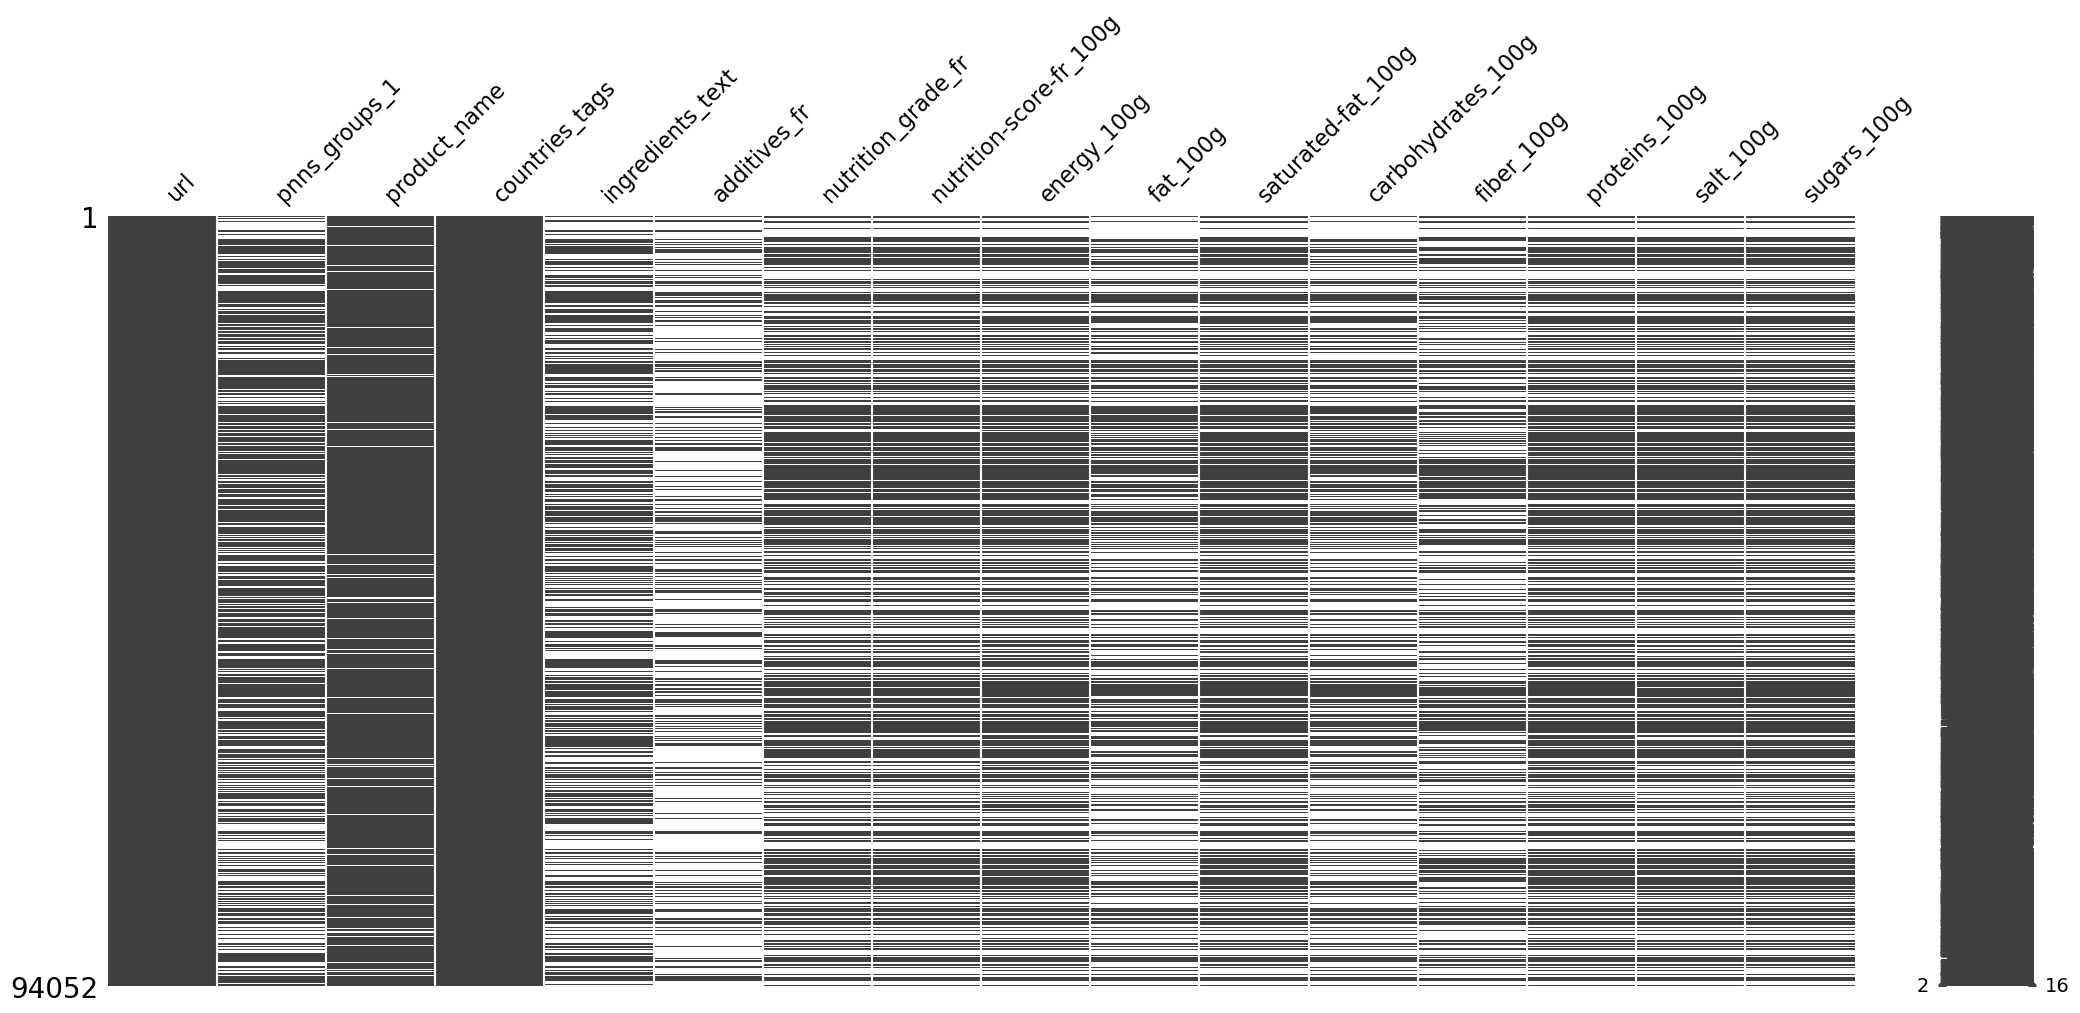

In [22]:
msno.matrix(filt_data)

In [37]:
filt_data['countries_tags'].unique()
cols = 'nutrition_grade_fr'
data[cols][0]

nan

In [24]:
pnns_groups = data2['pnns_groups_1'].dropna()

data2.loc[pnns_groups.index]


,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
46,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Filet de bÅuf,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Lion Peanut x2,"en:france,en:united-states","Milk chocolate coating (evaporated cane juice,...",E322 - LÃ©cithines,e,22.0,1883.0,20.00,12.5,70.00,2.5,2.50,0.09652,57.5
136,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Twix x2,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,http://world-fr.openfoodfacts.org/produit/0000...,unknown,Pack de 2 Twix,"en:france,en:united-states",NaN,NaN,NaN,NaN,1481.0,4.17,NaN,77.08,6.2,6.25,NaN,NaN
182,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320770,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,a,-4.0,1643.0,2.80,0.6,74.80,5.9,13.00,0.68,2.6
320774,http://world-fr.openfoodfacts.org/produit/988639,Sugary snacks,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320777,http://world-fr.openfoodfacts.org/produit/9900...,Sugary snacks,Miel de Camargue,en:france,Miel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320782,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,c,2.0,21.0,0.20,0.2,0.50,0.2,0.50,0.0254,0.5


In [25]:
# Supprimer les valeurs manquantes pnns_groups1
var_pnns_groups = data2['pnns_groups_1'].unique()
var_pnns_groups


array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [26]:
var_pnns_groups = var_pnns_groups[2:]
var_pnns_groups

array(['Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces',
       'fruits-and-vegetables', 'sugary-snacks', 'cereals-and-potatoes'],
      dtype=object)

In [27]:
mask = data2['pnns_groups_1'].isin(var_pnns_groups)
data2 = data2.loc[mask,:]

In [29]:
# change la variables salt_100g en float
data2['salt_100g'] = pd.to_numeric(data2['salt_100g'], errors ='coerce', downcast='float')


C:\Users\Dragomir\AppData\Local\Temp\ipykernel_13452\1729318380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['salt_100g'] = pd.to_numeric(data2['salt_100g'], errors ='coerce', downcast='float')


In [30]:
data2

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
182,http://world-fr.openfoodfacts.org/produit/0000...,Cereals and potatoes,lentilles vertes,en:france,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Biscuits sablÃ©s fourrage au cacao,en:france,"Sucre, farine de _BlÃ©_, graisse et huiles vÃ©...","E1400 - Dextrines,E322 - LÃ©cithines,E503 - Ca...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,ThÃ© de NoÃ«l aromatisÃ© orange-cannelle,en:france,"ThÃ© noir de Chine, zestes d'oranges 7,5 %, ar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.0,10.4,0.0,0.0,0.0254,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320770,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,a,-4.0,1643.0,2.8,0.6,74.8,5.9,13.0,0.6800,2.6
320774,http://world-fr.openfoodfacts.org/produit/988639,Sugary snacks,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320777,http://world-fr.openfoodfacts.org/produit/9900...,Sugary snacks,Miel de Camargue,en:france,Miel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320782,http://world-fr.openfoodfacts.org/produit/9911...,Beverages,ThÃ© vert Earl grey,en:france,"thÃ© vert, arÃ´me naturel bergamote avec autre...",NaN,c,2.0,21.0,0.2,0.2,0.5,0.2,0.5,0.0254,0.5


In [33]:
def del_rows(cols,name_df):
    cols = cols
    name_df= name_df[cols].dropna()
    return name_df
new = del_rows('nutrition_grade_fr',data2)

data3 = data2.loc[new.index]
data3.isna().mean()

url                        0.000000
pnns_groups_1              0.000000
product_name               0.002380
countries_tags             0.000000
ingredients_text           0.113852
additives_fr               0.463578
nutrition_grade_fr         0.000000
nutrition-score-fr_100g    0.000000
energy_100g                0.001322
fat_100g                   0.063272
saturated-fat_100g         0.001322
carbohydrates_100g         0.064435
fiber_100g                 0.354776
proteins_100g              0.001322
salt_100g                  0.001507
sugars_100g                0.001322
dtype: float64

In [32]:
data2.to_csv('Cleaned/exploratory_data_analisis.csv')
data3.to_csv('Cleaned/exploratory_data_analisis2.csv')